In [1]:
%%capture
#@markdown Start of notebook
!python -m pip install onnx
!python -m pip install abraia

import os
if not os.getenv('ABRAIA_ID') and not os.getenv('ABRAIA_KEY'):
    abraia_id = ''  #@param {type: "string"}
    abraia_key = ''  #@param {type: "string"}
    %env ABRAIA_ID=$abraia_id
    %env ABRAIA_KEY=$abraia_key

from abraia import Abraia

multiple = Abraia()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


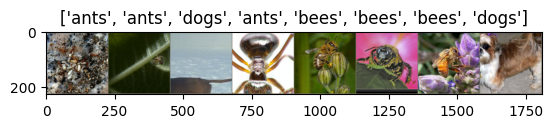

In [2]:
import torch
from torchvision import transforms
from abraia.torch import Dataset, visualize_data, create_model, train_model, visualize_model, save_model, export_onnx, save_json

dataset = 'hymenoptera_data'

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: Dataset(os.path.join(dataset), data_transforms[x]) for x in ['train', 'val']}
# image_datasets = {x: Dataset(os.path.join(dataset, x), data_transforms[x]) for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8, shuffle=True, num_workers=4) for x in ['train', 'val']}

visualize_data(dataloaders['train'])

In [3]:
class_names = image_datasets['train'].classes

model_conv = create_model(class_names)
model_ft = train_model(model_conv, dataloaders, num_epochs=25)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 150MB/s]


device cuda:0
Epoch 0/24
----------
train Loss: 1.0191 Acc: 0.5745
val Loss: 0.3291 Acc: 0.9078

Epoch 1/24
----------
train Loss: 0.4564 Acc: 0.8404
val Loss: 0.1921 Acc: 0.9610

Epoch 2/24
----------
train Loss: 0.5176 Acc: 0.8050
val Loss: 0.1258 Acc: 0.9645

Epoch 3/24
----------
train Loss: 0.3543 Acc: 0.8688
val Loss: 0.1031 Acc: 0.9716

Epoch 4/24
----------
train Loss: 0.3190 Acc: 0.8865
val Loss: 0.0924 Acc: 0.9787

Epoch 5/24
----------
train Loss: 0.3041 Acc: 0.8794
val Loss: 0.0835 Acc: 0.9716

Epoch 6/24
----------
train Loss: 0.3789 Acc: 0.8404
val Loss: 0.0862 Acc: 0.9752

Epoch 7/24
----------
train Loss: 0.2730 Acc: 0.8936
val Loss: 0.0734 Acc: 0.9716

Epoch 8/24
----------
train Loss: 0.2543 Acc: 0.9149
val Loss: 0.0725 Acc: 0.9752

Epoch 9/24
----------
train Loss: 0.2750 Acc: 0.9007
val Loss: 0.0722 Acc: 0.9752

Epoch 10/24
----------
train Loss: 0.3221 Acc: 0.8830
val Loss: 0.0715 Acc: 0.9752

Epoch 11/24
----------
train Loss: 0.2067 Acc: 0.9326
val Loss: 0.0730 A

True

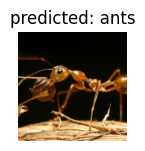

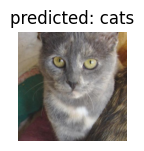

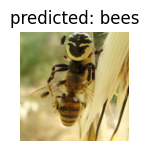

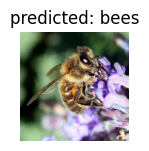

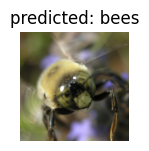

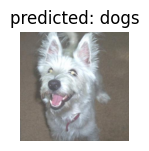

In [4]:
visualize_model(model_ft, dataloaders['val'])

In [5]:
save_model(os.path.join(dataset, 'model_ft.pt'), model_ft)
export_onnx(os.path.join(dataset, 'model_ft.onnx'), model_ft)
save_json(os.path.join(dataset, 'model_ft.json'), class_names)

In [ ]:
%%capture
#@markdown End of notebook
%notebook -e training.ipynb
multiple.upload_file('training.ipynb', f"{dataset}/")